# 평균 차량의 CO2 배출량

In [2]:
import zipfile
import os

# Extracting and inspecting the contents of the new zip file
zip_file_path_new = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive9.zip'
extracted_folder_path_new = 'C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/extracted_dataset_new/'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path_new, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path_new)

# Listing the contents of the extracted folder
extracted_files_new = os.listdir(extracted_folder_path_new)
extracted_files_new


['co2_emmision_test_data.csv', 'co2_emmision_train_data.csv']

In [3]:
import os

# Re-attempting to list the contents of the newly extracted folder
extracted_files_new = os.listdir(extracted_folder_path_new)
extracted_files_new


['co2_emmision_test_data.csv', 'co2_emmision_train_data.csv']

In [5]:
import pandas as pd

# Loading the CSV files for a detailed inspection
test_df = pd.read_csv(extracted_folder_path_new + 'co2_emmision_test_data.csv')
train_df = pd.read_csv(extracted_folder_path_new + 'co2_emmision_train_data.csv')

# Displaying the first few rows and column names of each dataset
test_preview = test_df.head()
train_preview = train_df.head()

(test_preview, train_preview)


(     Year   Make              Model  Vehicle Class  Engine Size (L)  \
 0  2023.0  Acura            Integra      Full-size              1.5   
 1  2023.0  Acura     Integra A-SPEC      Full-size              1.5   
 2  2023.0  Acura     Integra A-SPEC      Full-size              1.5   
 3  2023.0  Acura         MDX SH-AWD     SUV: Small              3.5   
 4  2023.0  Acura  MDX SH-AWD Type S  SUV: Standard              3.0   
 
    Cylinders Transmission Fuel Type  Fuel Consumption [City (L/100 km)]  \
 0        4.0          AV7         Z                                 7.9   
 1        4.0          AV7         Z                                 8.1   
 2        4.0           M6         Z                                 8.9   
 3        6.0         AS10         Z                                12.6   
 4        6.0         AS10         Z                                13.8   
 
    Fuel Consumption [Hwy (L/100 km)]  ...  Range 1 (km)  Recharge Time (h)  \
 0                           

In [15]:
train_df.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption [City (L/100 km)]',
       'Fuel Consumption [Hwy (L/100 km)]',
       'Fuel Consumption [Comb (L/100 km)]', 'Fuel Consumption [Comb (mpg)]',
       'CO2 Emissions (g/km)', 'Motor (kW)', 'Fuel Type 1',
       'Fuel Consumption Combined Le/100 km', 'Range 1 (km)',
       'Recharge Time (h)', 'Fuel Type 2', 'Range 2 (km)',
       'Fuel Consumption [City (kWh/100 km)]',
       'Fuel Consumption [Comb (kWh/100 km)]',
       'Consumption [City (Le/100 km)]', 'Consumption [Hwy (Le/100 km)]',
       'Consumption [Comb (Le/100 km)]', 'Range (km)'],
      dtype='object')

In [17]:
#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 여기서 'malgun.ttf'는 예시로 사용한 것이며, 실제 한글 폰트 파일로 변경해야 합니다.
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)



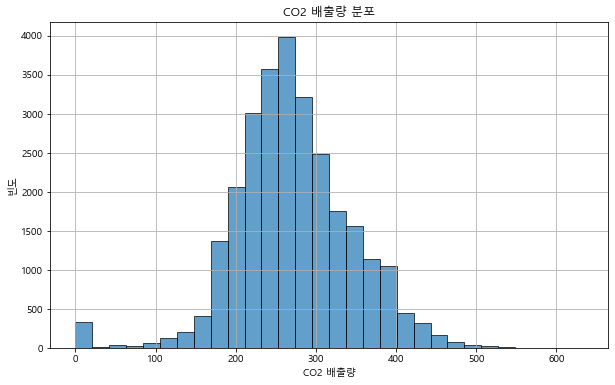

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# CO2 배출량 데이터 추출
co2_emissions = train_df['CO2 Emissions (g/km)']

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.hist(co2_emissions, bins=30, edgecolor='k', alpha=0.7)
plt.title('CO2 배출량 분포')
plt.xlabel('CO2 배출량')
plt.ylabel('빈도')
plt.grid(True)
plt.show()


정규분포 형태를 나타내고 있음

In [25]:
co2_emissions.describe()

count    27549.000000
mean       271.431449
std         73.451433
min          0.000000
25%        228.000000
50%        267.000000
75%        313.000000
max        633.000000
Name: CO2 Emissions (g/km), dtype: float64

EU에서는 신차에 대한 이상적인 CO2 배출량을 95g/km 로 정하고 있습니다. 이 기준을 통해서는 평균 271.43 g/km은 다소 높다고 할수있다.

# 평균 연도별 , 연료타입 CO2 배출량 분석

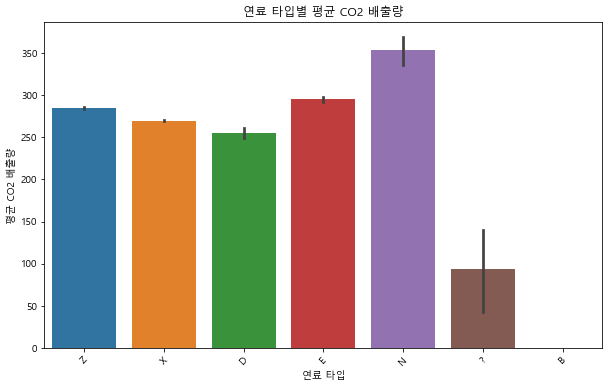

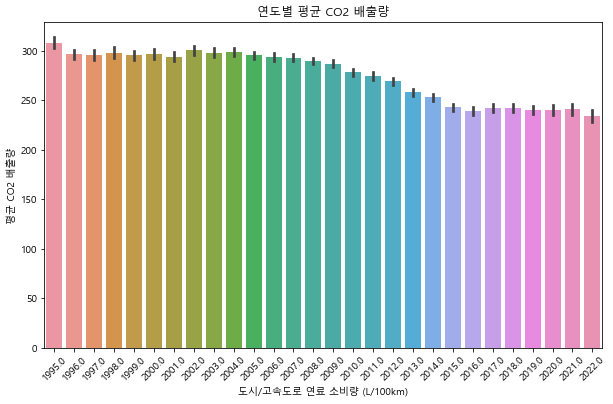

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 연료 타입별 CO2 배출량의 평균 계산
fuel_type_co2_mean = train_df.groupby('Fuel Type')['CO2 Emissions (g/km)'].mean().reset_index()

# 시각화: 연료 타입별 평균 CO2 배출량
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel Type', y='CO2 Emissions (g/km)', data=train_df)
plt.title('연료 타입별 평균 CO2 배출량')
plt.xlabel('연료 타입')
plt.ylabel('평균 CO2 배출량')
plt.xticks(rotation=45)
plt.show()

# 도시/고속도로 운행 패턴별 CO2 배출량의 평균 계산
driving_pattern_co2_mean = train_df.groupby('Fuel Consumption [City (L/100 km)]')['CO2 Emissions (g/km)'].mean().reset_index()

# 시각화: 도시/고속도로 운행 패턴별 평균 CO2 배출량
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='CO2 Emissions (g/km)', data=train_df)
plt.title('연도별 평균 CO2 배출량')
plt.xlabel('도시/고속도로 연료 소비량 (L/100km)')
plt.ylabel('평균 CO2 배출량')
plt.xticks(rotation=45)
plt.show()


연료 타입은 N(천연가스) > E(바이오 연료) > Z(가솔린) > X(휘발유) > D(디젤) 순으로 연료 효율이 좋았다.

연도별 CO2 배출량은 꾸준히 감소세를 보여주고 있다.